In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

1. How many are suffering from heart disease? Also plot the stats.
2. How many males and females have heart disease out of total?
3. Visualize frequency distribution of the thalach variable and find what's the heart rate and heart
   disease relation?
4. Find correlation matrix for all the variables with target.
5. Find Mean,Min & Max of age and plot its distribution.
6. Age and its relation to heart disease. Are young people more prone to heart disease?
7. Plot chest pain type pie chart.
8. What is the max heart rate achieved in non heart disease patients?

In [2]:
df = pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#How many are suffering from heart disease? Also plot the stats.

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

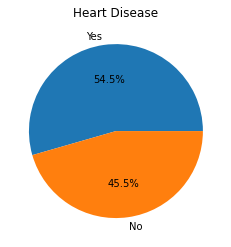

In [7]:
x = df['target'].value_counts()
plt.pie(x,labels=['Yes','No'],autopct="%1.1f%%")
plt.title('Heart Disease')
plt.show()

In [8]:
#How many males and females have heart disease out of total?

In [9]:
b = df.loc[(df.sex==1) & (df.target==1)]
m =print('Males',b['sex'].count())
m

Males 93


In [10]:
c = df.loc[(df.sex==0) & (df.target==1)]
f = print('Females',c['sex'].count())
f

Females 72


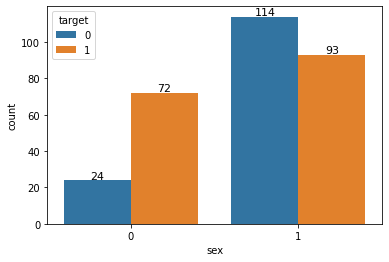

In [11]:
ax = sns.countplot(x ='sex', hue = "target",data = df)#----- 0:No    1:Yes
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

In [12]:
#Visualize frequency distribution of the thalach variable and find what's the heart rate and heart disease relation?

<AxesSubplot:xlabel='thalach', ylabel='Count'>

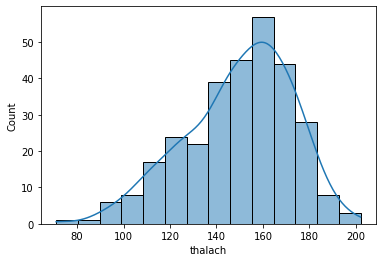

In [13]:
sns.histplot(df['thalach'],kde=True)

In [14]:
df['thalach'].corr(df['target'])#-------> Strong positive correlation

0.42174093381067435

In [15]:
#Find correlation matrix for all the variables with target.

<AxesSubplot:>

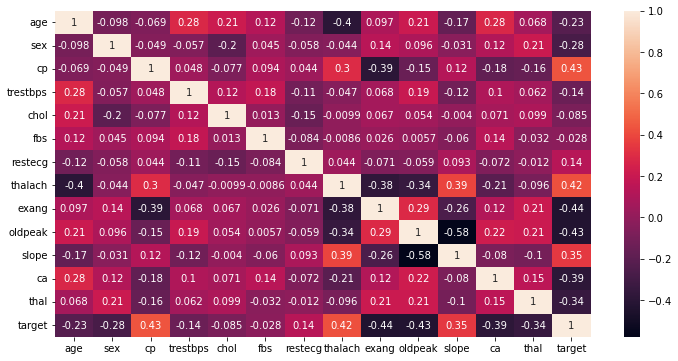

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [18]:
#Find Mean,Min & Max of age and plot its distribution.

In [19]:
q1=df['age'].min()
q2=df['age'].mean()
q3=df['age'].max()
("Minimum",q1),("Mean",q2),("Maximum",q3)

(('Minimum', 29), ('Mean', 54.366336633663366), ('Maximum', 77))

<AxesSubplot:xlabel='age', ylabel='Density'>

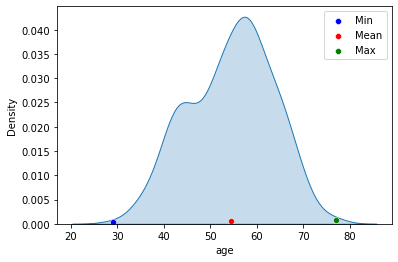

In [20]:
sns.kdeplot(df['age'],shade=True)
sns.scatterplot([q1],[0.00029],color = 'blue', label = "Min")
sns.scatterplot([q2],[0.00054], color = 'red', label = "Mean")
sns.scatterplot([q3],[0.00077], color = 'green', label = "Max")

In [21]:
#Age and its relation to heart disease. Are young people more prone to heart disease?

Correlation -0.22543871587483727


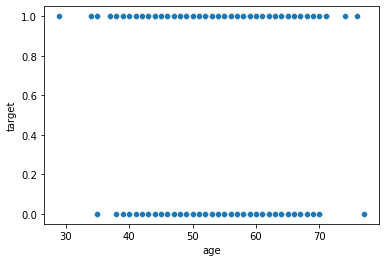

In [22]:
sns.scatterplot(df['age'],df['target'])
print('Correlation',df['age'].corr(df['target']))#--------> Zero negative correlation

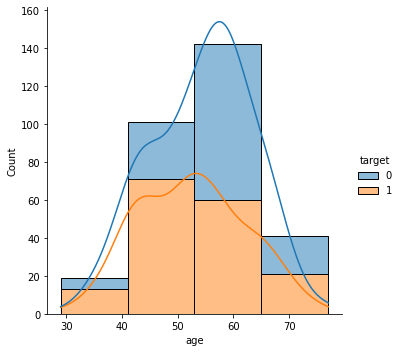

In [30]:
# sns.kdeplot(df['target'])
sns.displot(data=df,x='age',bins=4,kde=True,hue = 'target',multiple='stack')

<AxesSubplot:xlabel='target', ylabel='Density'>

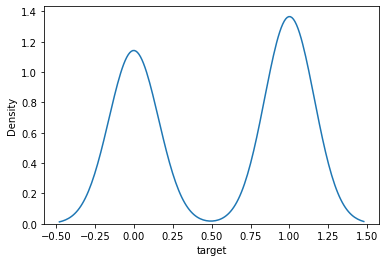

In [24]:
sns.kdeplot(df['target']) 

In [25]:
df.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [26]:
#Plot chest pain type pie chart.

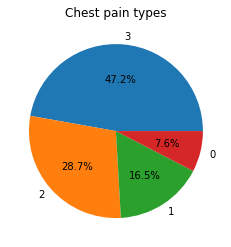

In [27]:
z = df['cp'].value_counts()
plt.pie(z,labels=df['cp'].unique(),autopct="%1.1f%%")
plt.title('Chest pain types')
plt.show()

In [28]:
#What is the max heart rate achieved in non heart disease patients?

In [29]:
a = df[df['target']==0]
max_=a.sort_values(by='thalach',ascending=False).head(1)
max_['thalach'].reset_index()

,index,thalach
0,248,195
